<a href="https://colab.research.google.com/github/GrrlhermeOlegario/taxa_de_inc-ndio_nos_ultimos_10-anos/blob/main/Taxa_de_Inc%C3%AAndio_nos_Ultimos_10_anos24_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


===== ESTATÍSTICAS GERAIS =====
Média geral da taxa de incêndio: 490.43
Desvio padrão geral: 615.76

===== MÉDIAS E DESVIOS PADRÃO POR ANO =====
     Ano       Média  Desvio Padrão
0   2015  357.882143     453.397943
1   2016  381.006429     482.694888
2   2017  421.805714     534.384510
3   2018  449.567857     569.556505
4   2019  462.773571     586.287761
5   2020  480.644286     608.927147
6   2021  499.457857     632.760878
7   2022  520.572857     659.513845
8   2023  574.835714     728.252576
9   2024  608.750000     771.221622
10  2025  637.469286     807.602067


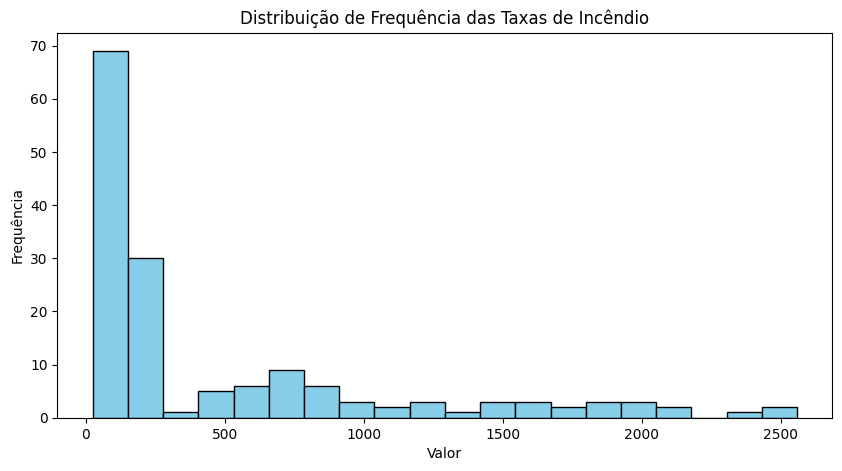


Coeficiente angular (inclinação): 26.788129870129882
Intercepto: -53621.58909090912


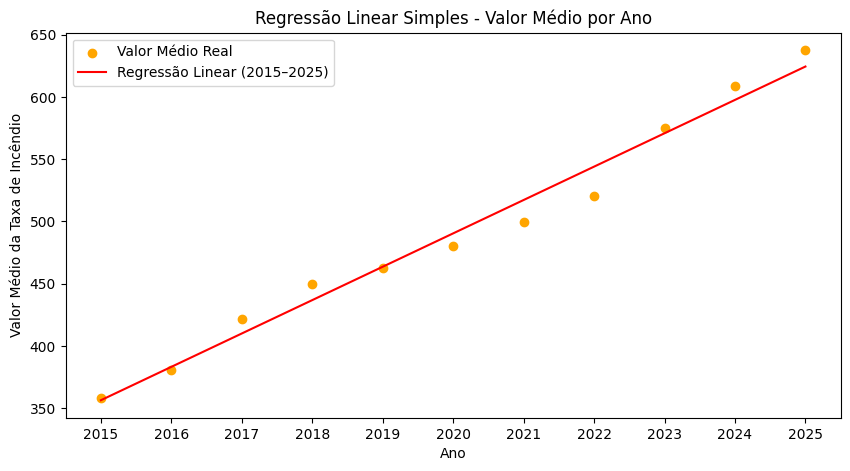


===== TABELA COMPLETA (Faixa, Área, Valor, Ano) =====

    Faixa              Área    Valor   Ano
0       A      Até 50m² (*)    42.65  2025
1       B          até 80m²   106.58  2025
2       C         até 120m²   127.91  2025
3       D         até 200m²   170.56  2025
4       E         até 300m²   213.21  2025
5       F    acima de 300m²   255.86  2025
8       A          até 50m²    85.30  2025
9       B          até 80m²   127.91  2025
10      C         até 120m²   255.86  2025
11      D         até 200m²   716.35  2025
12      E         até 300m²   938.09  2025
13      F         até 500m²  1193.90  2025
14      G       até 1.000m²  2131.99  2025
15      H  acima de 1.000m²  2558.40  2025
23      A      Até 50m² (*)    40.73  2024
24      B          até 80m²   101.78  2024
25      C         até 120m²   122.14  2024
26      D         até 200m²   162.87  2024
27      E         até 300m²   203.60  2024
28      F    acima de 300m²   244.33  2024
31      A          até 50m²    81.46  202

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carregar o arquivo
file_path = "/content/Taxa de Incêndio nos Ultimos 10 anos.xlsx"
xls = pd.ExcelFile(file_path)

# Ler todas as abas
bases = []
for ano in xls.sheet_names:
    df = pd.read_excel(file_path, sheet_name=ano)
    df = df.rename(columns={
        "IMÓVEIS RESIDENCIAIS": "Faixa",
        "Unnamed: 1": "Área",
        "Unnamed: 2": "Valor"
    })
    df = df[["Faixa", "Área", "Valor"]]
    df = df[df["Faixa"] != "FAIXA"]
    df["Ano"] = int(ano)
    bases.append(df)

# Concatenar todos os anos
dados = pd.concat(bases, ignore_index=True)
dados["Valor"] = pd.to_numeric(dados["Valor"], errors="coerce")
dados = dados.dropna(subset=["Valor"])

# ESTATÍSTICAS DESCRITIVAS

# Média e desvio padrão geral
media_geral = dados["Valor"].mean()
desvio_geral = dados["Valor"].std()

print("\n===== ESTATÍSTICAS GERAIS =====")
print(f"Média geral da taxa de incêndio: {media_geral:.2f}")
print(f"Desvio padrão geral: {desvio_geral:.2f}")

# Média e desvio padrão por ano
estatisticas_por_ano = dados.groupby("Ano")["Valor"].agg(["mean", "std"]).reset_index()
estatisticas_por_ano = estatisticas_por_ano.rename(columns={"mean": "Média", "std": "Desvio Padrão"})

print("\n===== MÉDIAS E DESVIOS PADRÃO POR ANO =====")
print(estatisticas_por_ano)


# HISTOGRAMA
plt.figure(figsize=(10,5))
plt.hist(dados["Valor"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribuição de Frequência das Taxas de Incêndio")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.show()


# REGRESSÃO LINEAR
valores_por_ano = dados.groupby("Ano")["Valor"].mean().reset_index()
X = valores_por_ano[["Ano"]]
y = valores_por_ano["Valor"]

modelo = LinearRegression()
modelo.fit(X, y)
valores_por_ano["Predição"] = modelo.predict(X)

print("\nCoeficiente angular (inclinação):", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)


# GRÁFICO DE REGRESSÃO
anos_prev = pd.DataFrame({"Ano": list(range(2015, 2026))})
anos_prev["Predição"] = modelo.predict(anos_prev[["Ano"]])

plt.figure(figsize=(10,5))
plt.scatter(X, y, color="orange", label="Valor Médio Real")
plt.plot(anos_prev["Ano"], anos_prev["Predição"], color="red", label="Regressão Linear (2015–2025)")
plt.title("Regressão Linear Simples - Valor Médio por Ano")
plt.xlabel("Ano")
plt.ylabel("Valor Médio da Taxa de Incêndio")
plt.xticks(range(2015, 2026))
plt.legend()
plt.show()


# TABELA COMPLETA
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
print("\n===== TABELA COMPLETA (Faixa, Área, Valor, Ano) =====\n")
print(dados)